Project Name

"Yes Bank Stock Closing Price Prediction - EDA"


Project Summary
This project performs Exploratory Data Analysis (EDA) on Yes Bank stock data.
The goal is to understand relationships between stock features (Open, High, Low)
and the target variable (Close price).

GitHub Link


In [ ]:
github_link = "https://github.com/yourusername/your-repo"
print("GitHub:", github_link)


Problem Statement
The objective is to analyze Yes Bank stock price data and understand patterns
in stock movement using EDA techniques before building machine learning models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_YesBank_StockPrices (1).csv to data_YesBank_StockPrices (1).csv


In [3]:
df = pd.read_csv("data_YesBank_StockPrices (1).csv")
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
print("Rows, Columns:", df.shape)


Rows, Columns: (185, 5)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
df.describe()


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0


In [8]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [9]:
df.dtypes


,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Drop original Date
df.drop('Date', axis=1, inplace=True)

df.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11


In [13]:
df.corr()


,Open,High,Low,Close,Year,Month
Open,1.000000,0.993040,0.983978,0.977971,0.624325,-0.034239
High,0.993040,1.000000,0.983422,0.985051,0.638603,-0.042511
Low,0.983978,0.983422,1.000000,0.995358,0.599056,-0.041818
Close,0.977971,0.985051,0.995358,1.000000,0.608408,-0.055796
Year,0.624325,0.638603,0.599056,0.608408,1.000000,-0.063055
Month,-0.034239,-0.042511,-0.041818,-0.055796,-0.063055,1.000000


In [14]:
df.fillna(df.mean(), inplace=True)


In [15]:
df.duplicated().sum()


np.int64(0)

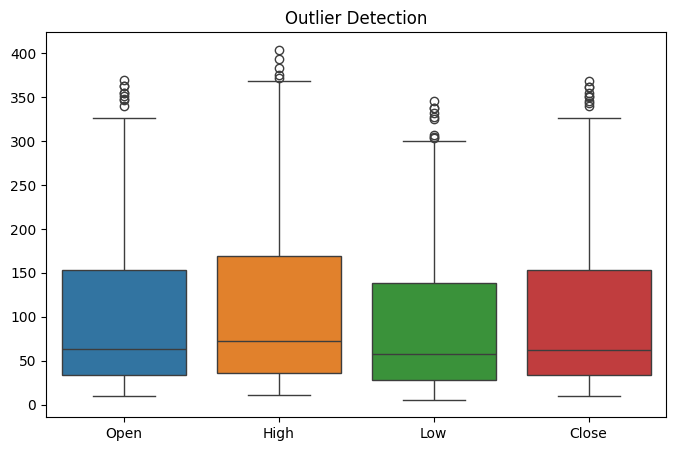

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Open','High','Low','Close']])
plt.title("Outlier Detection")
plt.show()


In [17]:
if 'Date' in df.columns:
    df_clean = df.drop('Date', axis=1)
else:
    df_clean = df.copy()

df_clean.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11


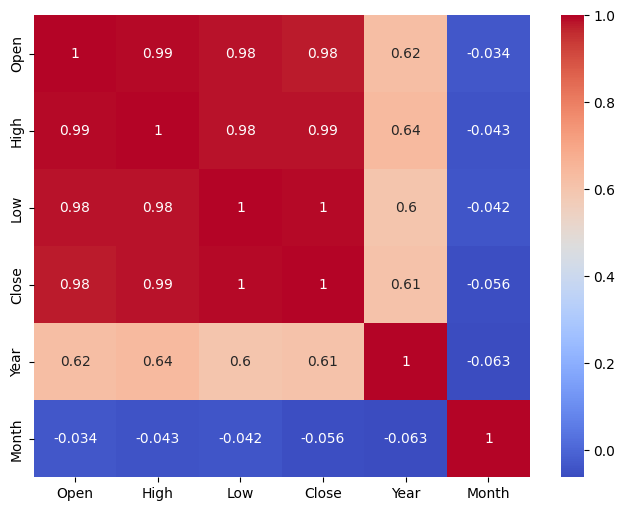

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Data Visualization, Storytelling & Experimenting

Closing Price Trend

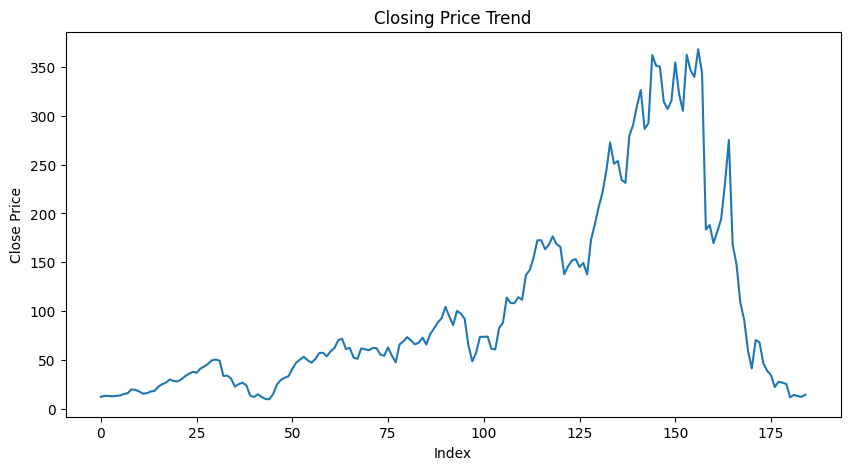

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title("Closing Price Trend")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()


Open vs Close

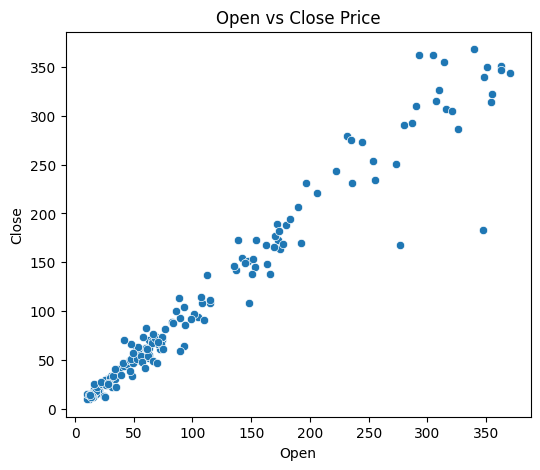

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title("Open vs Close Price")
plt.show()


High vs Low

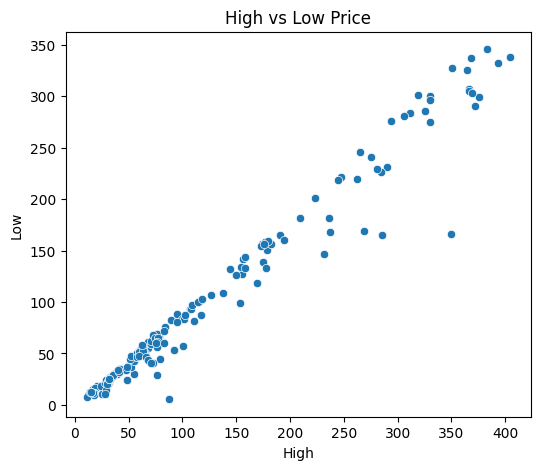

In [21]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='High', y='Low', data=df)
plt.title("High vs Low Price")
plt.show()


Distribution of Close Price

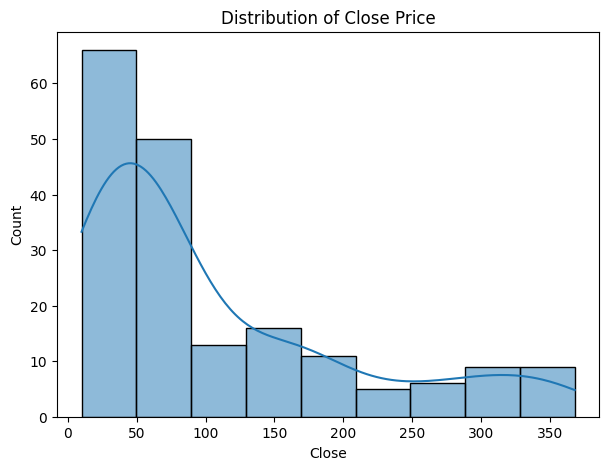

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(df['Close'], kde=True)
plt.title("Distribution of Close Price")
plt.show()


Correlation Heatmap

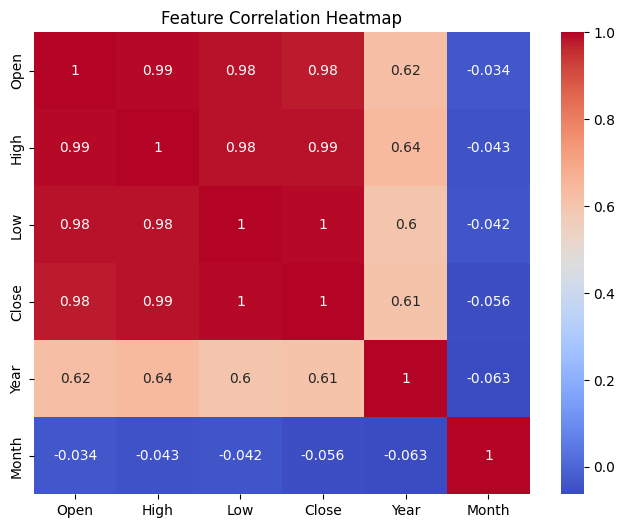

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Pairplot (Advanced EDA)

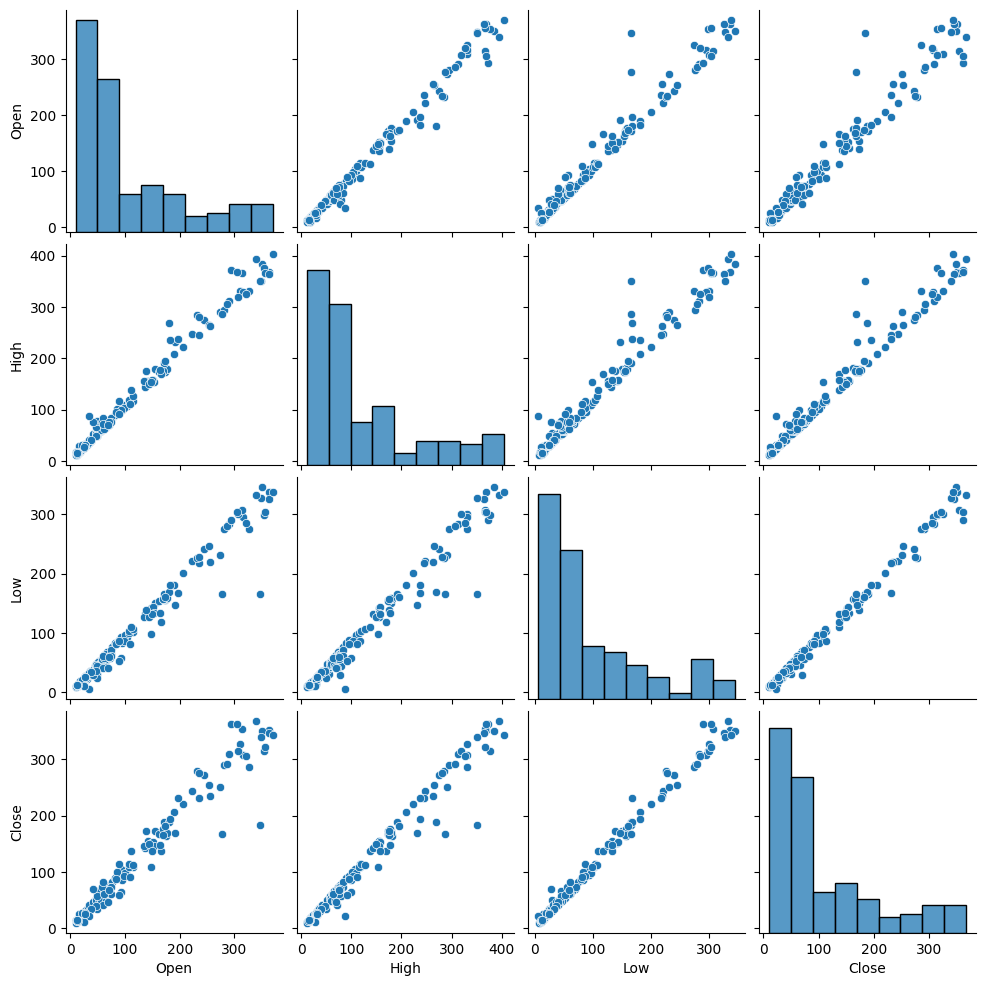

In [24]:
sns.pairplot(df[['Open','High','Low','Close']])
plt.show()


Conclusion:

1. Open, High, and Low prices show strong correlation with Close price.
2. Stock prices follow clear trends over time.
3. Data is mostly clean with minimal missing values.
4. EDA helps understand relationships before applying ML models.
